# import + set paths

In [1]:

from utilities.utils import recording_id_list
from utilities.prepare_data_funcs import *


# path = r"Z:\projects\sequence_squad\organised_data\animals\\"
path = r"Z:\projects\sequence_squad\revision_data\organised_data\animals\\"


## set main params 

mouse_implant_recordings = ["seq008_1_3","seq006_1_1","seq006_1_2","seq006_1_3","seq006_1_4","seq006_1_5","seq006_1_6","seq006_1_8","seq006_1_9","seq006_1_10","seq006_1_11"]
probe = 'B'
mouse_implant_recordings = ["seq006_1_3"]
time_span = 'Awake' #'Awake' #'Post_sleep' # 'Medium_pre_sleep' #'Post_sleep'#'Pre_sleep,'Short_awake'
region = 'undefined' #striatum m_cortex or both

# ["136_1_3","136_1_4","149_1_2","178_1_4","178_1_5","178_1_6","178_1_8","178_1_9","178_2_1","178_2_2","178_2_4","238_1_4","238_1_5"]


Figure directory set to:  C:\Users\Emmett\Documents\Sequence\sequences_run_PPseq\utilities\figures/


************************************************
seq006_1_3
recording found = Z:\projects\sequence_squad\revision_data\organised_data\animals\\seq006_implant1\recording3_18-11-2024
************************************************

PARSED ARGUMENTS
    full_path_to_data          <class 'str'>        Z:\projects\sequence_squad\revision_data\organised_data\animals\\seq006_implant1\recording3_18-11-2024
    mouse_implant_recording    <class 'str'>        seq006_1_3
    output_filename            <class 'str'>        seq006_1_3
    save_path                  <class 'str'>        Z:\projects\sequence_squad\revision_data\organised_data\ppseq_data\prepared_data\\undefined\Awake\
    time_span                  <class 'str'>        Awake
    single_or_multiunits       <class 'str'>        both
    region                     <class 'str'>        undefined
    use_emmett_curation        <class 'bool'>       False
    max_firing_rate            <class 'float'>      15.0
    align_to_zero           

C:\Users\Emmett\anaconda3\envs\si_env\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Emmett\anaconda3\envs\si_env\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Emmett\anaconda3\envs\si_env\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Emmett\anaconda3\envs\si_env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Emmett\anaconda3\envs\si_env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


    • Searching for behavioural data at Z:\projects\sequence_squad\revision_data\organised_data\animals\\seq006_implant1\recording3_18-11-2024\behav_sync/2_task/Transition_data_sync.csv
    • Searching for sleep data at Z:\projects\sequence_squad\revision_data\organised_data\animals\\seq006_implant1\recording3_18-11-2024\post_process_ppseq
['Performance score.png', 'Performance_score.csv', 'Time_intervales.txt', 'velocity_mice_3_post_sleep.csv']
Z:\projects\sequence_squad\revision_data\organised_data\animals\\seq006_implant1\recording3_18-11-2024\post_process_ppseq\velocity_mice_3_post_sleep.csv
      found post file
    • Smoothing sleep data
        Perf loaded
    • Figure saved to:  Z:\projects\sequence_squad\revision_data\organised_data\ppseq_data\prepared_data\\undefined\Awake\plots\seq006_1_3_prepare_data.png and to 

SAVING DATA
    • data '.txt' file saved to:          Z:\projects\sequence_squad\revision_data\organised_data\ppseq_data\prepared_data\\undefined\Awake\ppseq_ready

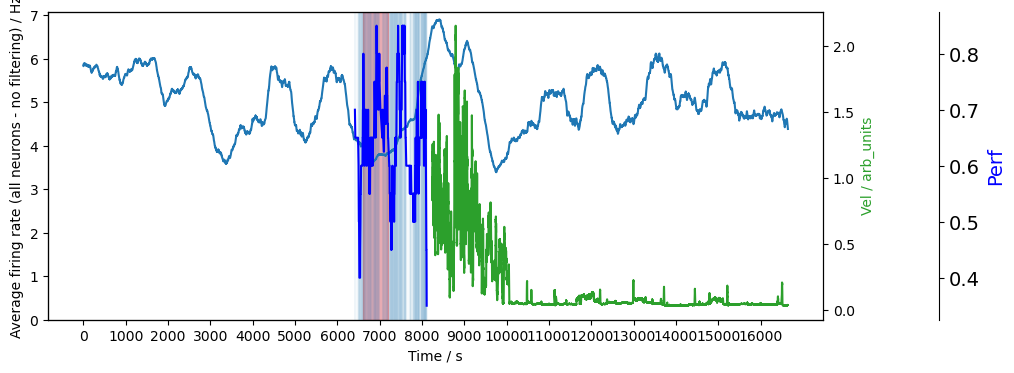

In [2]:
# for region in ['striatum', 'm_cortex','both']:
for index,mir in enumerate(mouse_implant_recordings):

    mouse_name = mir.split('_')[0]
    implant_num = mir.split('_')[1]
    recording_num = mir.split('_')[-1]
    
    for mir_file in os.listdir(path):
        if mir_file.split('_')[0] == mouse_name:
            animal_path = os.path.join(path,mir_file)

    for recording in os.listdir(animal_path):
        if recording_num == recording.split('_')[0].split('g')[-1]:
            animal_recording_path = os.path.join(animal_path,recording)
            current_spikes_path = animal_recording_path + r'\ephys\\'
            print('************************************************')
            print(mir)
            print(f'recording found = {animal_recording_path}')
            print('************************************************')
            process = True

    if process == True:
        ## set params

        full_path_to_data = animal_recording_path
        mouse_implant_recording =mir
        output_filename = mir
#                 save_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\prepared_data\\"
        save_path = r"Z:\projects\sequence_squad\revision_data\organised_data\ppseq_data\prepared_data\\"
        min_fano_factor = 0.5
        max_fano_factor = 12
        max_firing_rate = 15.0 # deafult #removes igh firing rate neurons
        single_or_multiunits = 'both'
        align_to_zero = True  #if true then spike trains start from 0
        shuffle = 'None' #'shuffle_clusters' # options for shuffeling data, other options are: 'shuffle_clusters' and 'jitter_timeToJitterInSecs' e.g. 'jitter_0.1' 
        visualise = True #True will plot a summary, False will skip this
        use_emmett_curation = False

        # set save path
        if shuffle == 'None':
            save_path = os.path.join(os.path.join(save_path,region),time_span) + '\\'
        else:
            save_path = os.path.join(os.path.join(save_path,region),time_span) + '\\' + shuffle + '\\'
            print(save_path)
            
        # for sleep stuff:
        awake_data_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\finalised_output\striatum\awake\\"

        args = {
            "full_path_to_data": animal_recording_path,
            "mouse_implant_recording": mouse_implant_recording,
            "output_filename": output_filename,
            "save_path": save_path,
            "time_span": time_span,
            "single_or_multiunits": single_or_multiunits,
            "region": region,
            "use_emmett_curation": use_emmett_curation,
            "max_firing_rate": max_firing_rate,
            "align_to_zero": align_to_zero,
            "shuffle": shuffle,
            "visualise": visualise,
            "min_fano_factor": min_fano_factor,
            "max_fano_factor": max_fano_factor,
            "awake_data_path": awake_data_path,
            "probe": probe
        }

        ## RUN Prepare data
        prepare_data(args)